## Chapter 9: Algorithm Analysis

In [22]:
function poly1(coeffs::Vector{T}, x::S) where {T <: Number, S <: Number}
  local sum = zero(T)
  function pow(x::T,n::Int) where T <: Number
    local prod = one(T)
    for j=1:n
      prod *=x
    end
    prod
  end 
  for n=1:length(coeffs)
    sum += coeffs[n]*pow(x,n-1)
  end
  sum
end

poly1 (generic function with 1 method)

In [23]:
poly1([1,2,3,4],4)

313

In [26]:
using BenchmarkTools, Plots, LsqFit

┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1278


In [27]:
time = zeros(Float64,200)
for i=25:25:200
  coeffs = rand(BigFloat,i)
  time[i] = @belapsed poly1($coeffs,1/big(3))
end

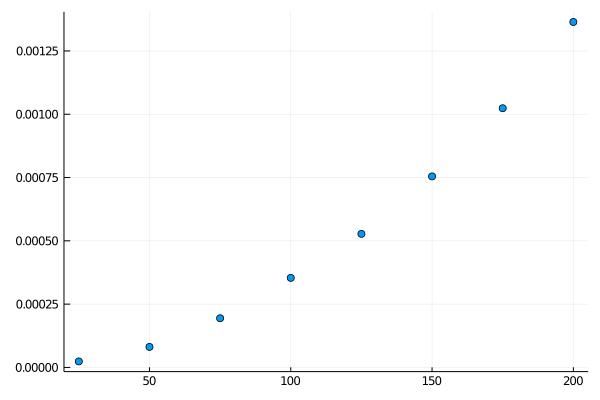

In [28]:
scatter(25:25:200,time[25:25:200],legend=false)

In [29]:
 model(t, p) = p[1].+p[2].*t.+p[3].*t.^2

model (generic function with 1 method)

In [8]:
fit = curve_fit(model, 25:25:200, time[25:25:200], [1e-8,1e-8,1e-8])

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([1.159660689810269e-6, 7.711928626240384e-8, 3.0950904759562184e-8], [-1.1004167890326958e-7, -1.830113098164068e-6, 4.2144643202783496e-7, -9.543630883275295e-7, 7.193458340769971e-6, 9.693910719320016e-6, -2.7507005952677336e-5, 1.309270832477831e-5], [1.0000000000000002 25.0 625.0; 0.9999999999999993 50.0 2500.0; … ; 1.0000000000000004 175.0 30625.000000000004; 1.0000000000000093 200.0 40000.0], true, Float64[])

In [9]:
fit.param

3-element Array{Float64,1}:
 1.159660689810269e-6
 7.711928626240384e-8
 3.0950904759562184e-8

In [10]:
stderr = standard_error(fit)

UndefVarError: UndefVarError: standard_error not defined

In [11]:
confidence_interval(fit, 0.05)

3-element Array{Tuple{Float64,Float64},1}:
 (-5.150505682991439e-5, 5.382437820953493e-5)
 (-9.969080542554386e-7, 1.1511466267802461e-6)
 (2.6291119905796406e-8, 3.5610689613327965e-8)

In [12]:
fit.param[3]

3.0950904759562184e-8

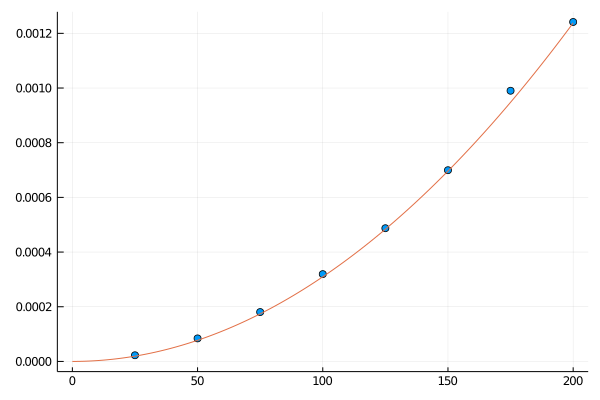

In [13]:
plot!(n->fit.param[3]*n^2,0:200)

In [14]:
function horner(coeffs::Vector{T},x::S) where {T <: Number, S <: Number}
  result = coeffs[end] 
  for i=length(coeffs)-1:-1:1
    result = x*result+coeffs[i]
  end
  result
end

horner (generic function with 1 method)

In [15]:
htime = zeros(Float64,200)
for i=25:25:200
  coeffs = rand(BigFloat,i)
  htime[i] = @belapsed horner($coeffs,1/big(3))
end

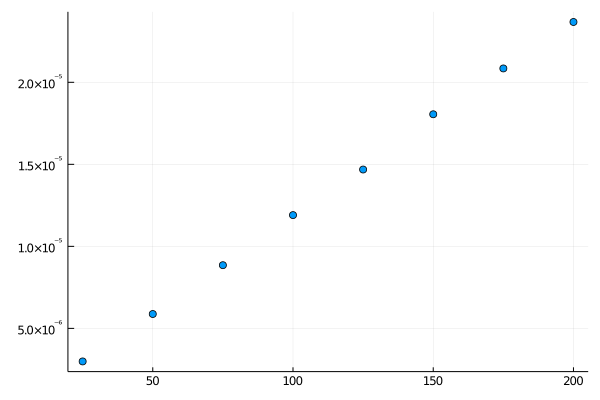

In [16]:
scatter(25:25:200,htime[25:25:200],legend=false)

In [17]:
fit2 = curve_fit(model, 25:25:200, htime[25:25:200], [1e-8,1e-8,1e-8])

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([-6.331919642638113e-8, 1.197136408729668e-7, -2.843253968044149e-12], [-5.763020833223934e-8, 3.942137896851551e-8, 4.7210565475879463e-8, -2.5387648810143692e-8, 1.734600694437775e-7, -2.212462797623546e-7, -4.55066964285457e-8, 8.967881944520613e-8], [1.0000000000000002 25.0 625.0; 0.9999999999999999 50.0 2500.0; … ; 1.0000000000000002 175.0 30625.0; 0.9999999999999999 200.0 40000.0], true, Float64[])

In [18]:
fit2.param

3-element Array{Float64,1}:
 -6.331919642638113e-8
  1.197136408729668e-7
 -2.843253968044149e-12

In [19]:
confidence_interval(fit2)

3-element Array{Tuple{Float64,Float64},1}:
 (-5.62580402288669e-7, 4.3594200943590677e-7)
 (1.0953186813384267e-7, 1.2989541361209092e-7)
 (-4.7017986402118336e-11, 4.1331478466030036e-11)

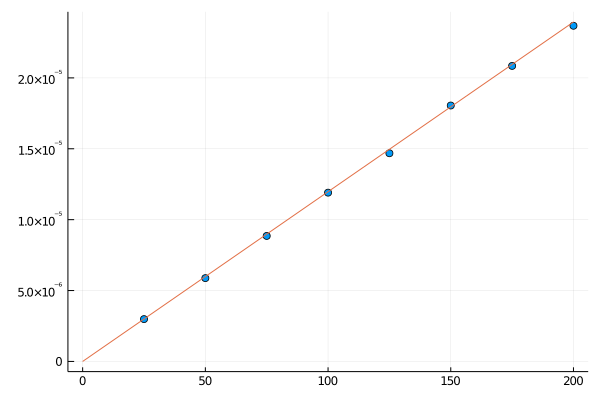

In [20]:
plot!(n->fit2.param[2]*n,0:200)

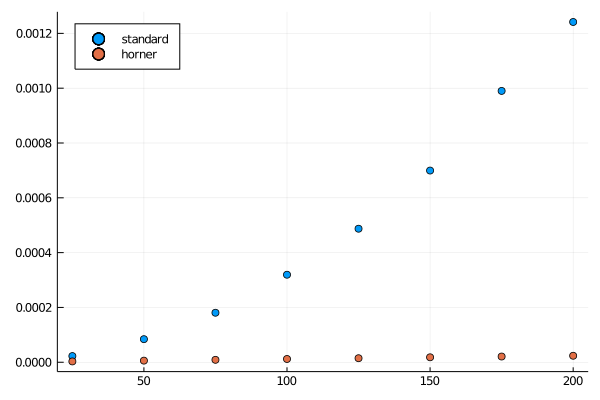

In [21]:
scatter(25:25:200,time[25:25:200],label="standard",legend=:topleft)
scatter!(25:25:200,htime[25:25:200],label="horner")

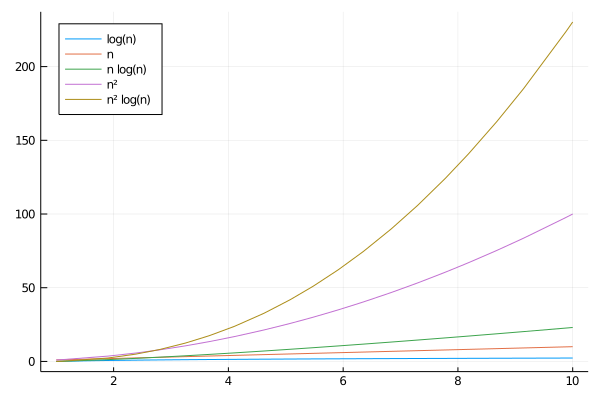

In [22]:
plot([x->log(x),x->x,x->x*log(x),x->x^2,x->x^2*log(x)],1,10,
    label=["log(n)" "n" "n log(n)"  "n²" "n² log(n)"],
    legend=:topleft)

### Testing the speed of Primes

In [23]:
function isPrime5(n::Integer)
  if n%2==0
    return false
  end
  for k=3:2:round(Int,sqrt(n))
    if n%k==0
      return false
    end
  end
  true
end

isPrime5 (generic function with 1 method)

In [24]:
using Primes

In [25]:
the_primes = map(nextprime,20_000_000:20_000_000:1_000_000_000)
times=zeros(Float64,length(the_primes))
for i=1:length(the_primes)
  times[i] = @belapsed isPrime5($the_primes[$i])
end

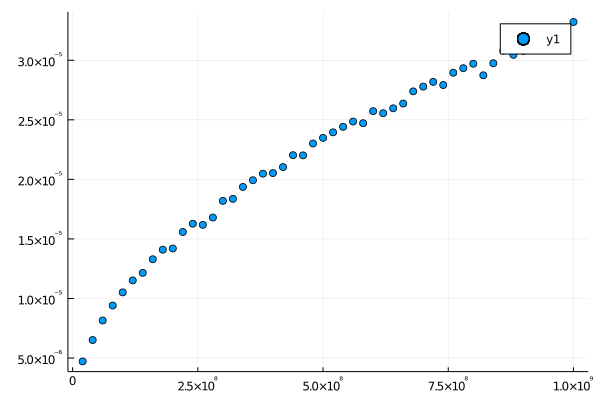

In [33]:
scatter(20_000_000:20_000_000:1_000_000_000,times)

In [44]:
 model2(t, p) = p[1].+p[2].*t.+p[3].*log.(t).+p[4].*t.*log.(t)

model2 (generic function with 1 method)

In [49]:
model2(t,p) = p[1].+p[2].*log.(t)

model2 (generic function with 1 method)

In [56]:
fit3 = curve_fit(model2,1:length(times), times, [-1e-4, 1e-8]);

In [57]:
fit3.param

2-element Array{Float64,1}:
 -2.469558339757281e-6
  8.314947267271669e-6

In [58]:
confidence_interval(fit3)

2-element Array{Tuple{Float64,Float64},1}:
 (-4.43377246341674e-6, -5.053442160978221e-7)
 (7.680770313972183e-6, 8.949124220571155e-6)

In [38]:
length(times)

50

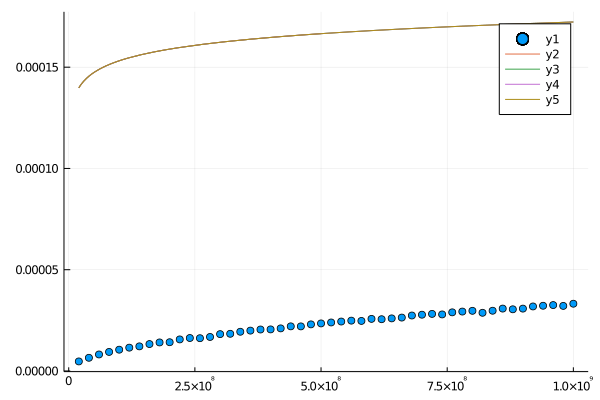

In [59]:
plot!(t->fit3.param[2]*log(t),20_000_000,1_000_000_000)

In [30]:
times3 = Float64[]
sizes3 = [250*n for n=1:10]
for size in sizes3
  A=rand(size,size)
  x=rand(size)
  push!(times3,@belapsed A*x)
end

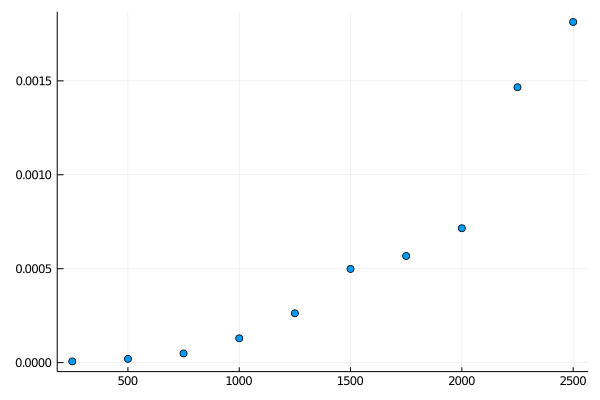

In [45]:
scatter(sizes3,times3, legend = false)

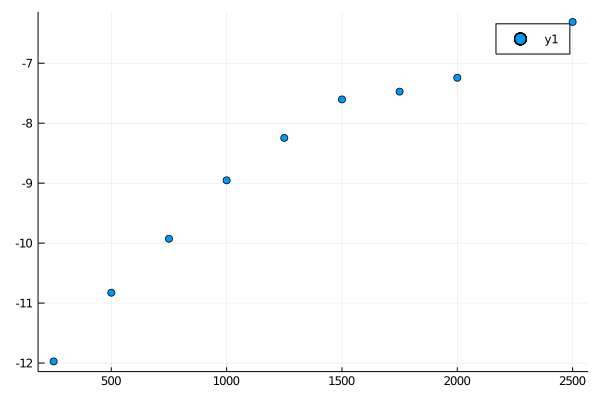

In [32]:
scatter(sizes3,log.(times3))

In [53]:
# model3(t, p) = p[1].*t.*log.(t)+p[2].*t.^2
model3(t,p)=p[1].*t.^2

model3 (generic function with 1 method)

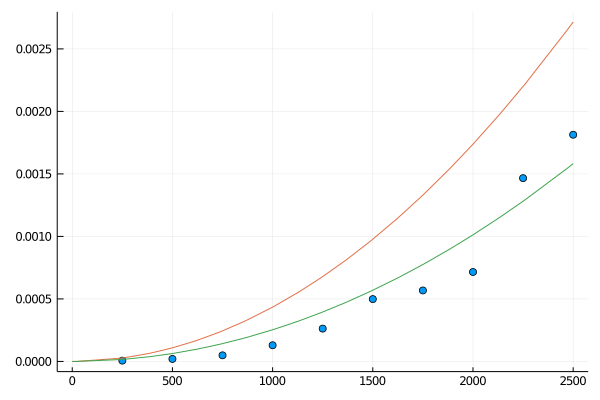

In [58]:
plot!(t->fit3.param[1]*t^2,0,2500)

In [59]:
using FFTW

In [116]:
times3 = Float64[]
sizes3 = [2^n for n=10:18]
for size in sizes3
  x=rand(size)
  t = @belapsed fft($x)
  push!(times3,t)
end

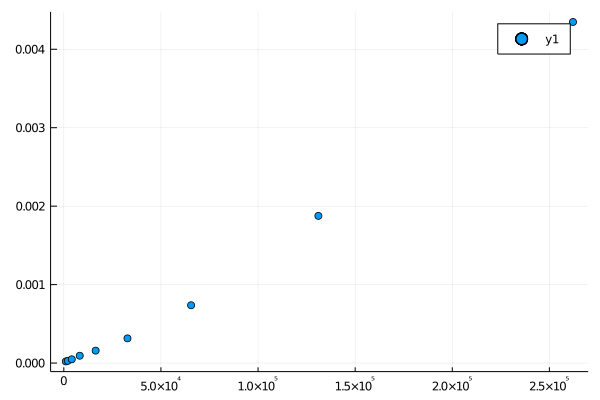

In [123]:
scatter(sizes3,times3)

In [117]:
model3(t, p) = p[1].*t + p[2].*t.*log.(t)+p[3].*t.^2

model3 (generic function with 1 method)

In [118]:
fit3 = curve_fit(model3,sizes3, times3, [1e-4,1e-4,1e-4]);

In [119]:
confidence_interval(fit3)

3-element Array{Tuple{Float64,Float64},1}:
 (-3.6579203458810267e-8, 9.190538857889106e-9)
 (1.4780086719839696e-10, 4.397396779802908e-9)
 (-7.237512339237511e-15, 2.2066183668344277e-14)

In [120]:
model3(t, p) = p[1].*t.*log.(t)

model3 (generic function with 1 method)

In [121]:
fit3 = curve_fit(model3,sizes3, times3, [1e-4]);

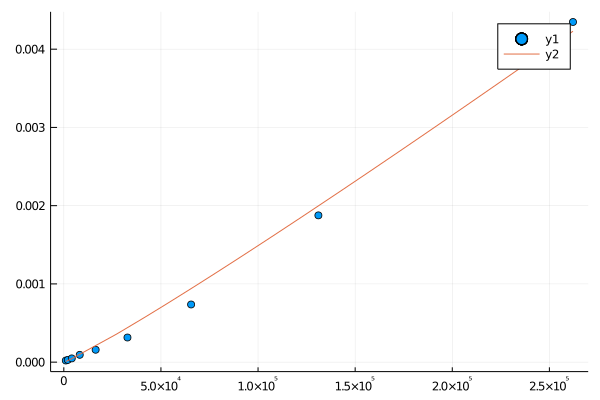

In [124]:
plot!(t->fit3.param[1]*t*log(t),first(sizes3),last(sizes3))